# 💳Detecting Credit Card Fraud using Machine learning 

>In this notebook, we're going to go through an example machine learning project <br> 
with the goal of detecting fraudulent credit card transactions so that customers <br>
are not charged for items that they did not purchase. <br> 

## 1. Problem definition

> How well can we detect whether a credit transaction is fradulent or genuine given <br> 
some numerical features or variables.

## 2. Data

The data is downloaded from the [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

>The dataset contains transactions made by credit cards in September 2013 by European cardholders.<br>
This dataset presents transactions that occurred in two days, where we have 492 frauds out of<br>
284,807 transactions.The dataset is highly unbalanced, the positive class (frauds) account for<br>
0.172% of all transactions.<br>

 
## 3. Evaluation 

Given the class imbalance ratio, the `Area Under the Precision-Recall Curve` is recommended<br> 
for measuring accuracy. Confusion matrix accuracy is not meaningful for unbalanced classification.

## 4. Features 
 
 >It contains only numerical input variables which are the result of a PCA transformation.<br> 
Unfortunately, due to confidentiality issues, we cannot provide the original features and more <br> 
background information about the data. Features V1, V2, … V28 are the principal components obtained<br> 
with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.<br> 
Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the<br> 
dataset.<br> 

>The feature `Amount` is the transaction Amount, this feature can be used for example-dependant<br> 
cost-sensitive learning.<br> 
Feature `Class` is the response variable and it takes value `1` in case of fraud and `0` otherwise

# Preparing Tools

Numpy, pandas, matplotlib, and seaborn will be used for data analysis and manipulation

In [1]:
#Import all the tools we need 

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import plotly
import seaborn as sns

#Enabling the offline mode for interactive plotting locally
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
sns.set_style("darkgrid")

#we want our plot to appear inside the notebook
%matplotlib inline 

#Models and Metrics from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.model_selection import StratifiedKFold

# Load Data

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
df.shape

(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Describing the data
df.describe(percentiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.44, 0.56, 0.88, 0.92])

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
1%       2422.000000 -6.563199e+00 -4.960300e+00 -3.978377e+00 -3.122987e+00   
2%       5964.120000 -4.757888e+00 -3.419452e+00 -3.192457e+00 -2.742465e+00   
3%      11490.180000 -3.864514e+00 -2.677873e+00 -2.809154e+00 -2.528801e+00   
4%      19880.720000 -3.298547e+00 -2.236980e+00 -2.572682e+00 -2.362446e+00   
5%      25297.600000 -2.899147e+00 -1.971975e+00 -2.389740e+00 -2.195683e+00   
6%      28426.360000 -2.604921e+00 -1.787717e+00 -2.232574e+00 -2.041926e+00   
7%      30660.840000 -2.381382e+00 -1.649294e+00 -2.098802e+00 -1.913953e+00   
8%      32432.000000 -2.183695e+00 -1.536374e+00 -1.985171e+00 -1.816284e+00   
9%      33699.540000 -2.025807e+00 -1.443029e+00 -1.885165e+00 -1.732360e+00   
10%     35027.000000 -1.893272e+00 -1.359862e+00 -1.802587e+00 -1.656329e+00   
44%     77613.000000 -3.013074e-01 -6.546671e-02 -3.853767e-02 -2.363107e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
56%    112556.080000  7.590868e-01  2.018134e-01  3.645616e-01  1.723192e-01   
88%    155001.000000  1.983344e+00  1.224912e+00  1.566197e+00  1.358761e+00   
92%    160279.000000  2.042643e+00  1.465491e+00  1.800616e+00  1.696281e+00   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
1%    -3.060396e+00 -2.124023e+00 -3.012847e+00 -4.033899e+00 -2.455288e+00   
2%    -2.280545e+00 -1.777548e+00 -2.060577e+00 -2.482355e+00 -2.208978e+00   
3%    -1.999164e+00 -1.607532e+00 -1.756126e+00 -1.696369e+00 -2.023964e+00   
4%    -1.827092e+00 -1.488528e+00 -1.569482e+00 -1.111268e+00 -1.889022e+00   
5%    -1.702021e+00 -1.406757e+00 -1.434423e+00 -8.421469e-01 -1.758426e+00   
6%    -1.601647e+00 -1.343659e+00 -1.330192e+00 -6.975611e-01 -1.646555e+00   
7%    -1.510612e+00 -1.288168e+00 -1.246063e+00 -6.089100e-01 -1.541464e+00   
8%    -1.431076e+00 -1.242475e+00 -1.183942e+00 -5.444541e-01 -1.446596e+00   
9%    -1.364763e+00 -1.203030e+00 -1.129334e+00 -4.951725e-01 -1.363815e+00   
10%   -1.302171e+00 -1.167450e+00 -1.078148e+00 -4.589454e-01 -1.294047e+00   
44%   -1.930189e-01 -3.943311e-01 -7.186912e-02 -3.151168e-02 -1.711264e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
56%    8.764183e-02 -1.442670e-01  1.405578e-01  7.994378e-02  7.805328e-02   
88%    1.240156e+00  1.231871e+00  9.601274e-01  6.890824e-01  1.175831e+00   
92%    1.617775e+00  1.957705e+00  1.147684e+00  8.560603e-01  1.451741e+00   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
1%     ... -1.469679e+00 -1.654625e+00 -1.193417e+00 -1.657308e+00   
2%     ... -9.512384e-01 -1.406782e+00 -7.635010e-01 -1.455924e+00   
3%     ... -6.829981e-01 -1.270531e+00 -6.127155e-01 -1.361242e+00   
4%     ... -5.651468e-01 -1.164705e+00 -5.302926e-01 -1.288145e+00   
5%     ... -5.046735e-01 -1.081892e+00 -4.722

In [9]:
# Checking the number of different classes
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Checking the fraud data 
fraud = df[df["Class"]==1]
genuine = df[df["Class"]==0]

In [11]:
print("fraud shape:{}".format(fraud.shape), end="\n")
print("genuine shape:{}".format(genuine.shape))

fraud shape:(492, 31)
genuine shape:(284315, 31)


In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Exploratory Data Analysis

In [14]:
print("Finding the most important features")

df_corr = df.corr()
df_corr.sort_values(["Class"], ascending = False, inplace = True)
df_corr["Class"]

Finding the most important features


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

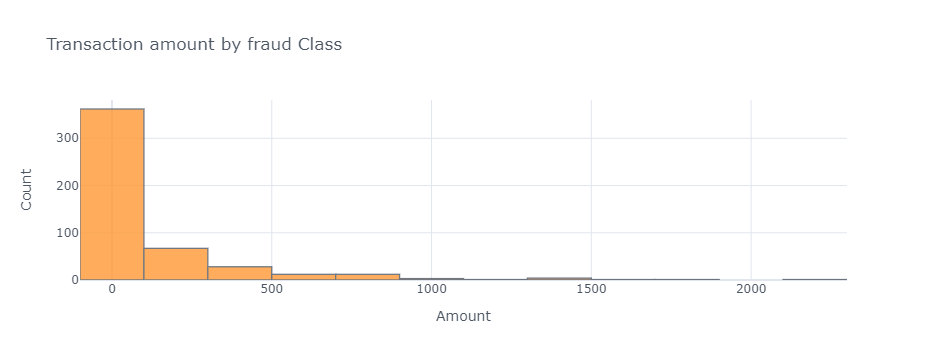

In [15]:
# Visualising Transaction Amount by Fraud class
fraud["Amount"].iplot(kind="histogram", bins=20, theme="white", title="Transaction amount by fraud Class",
                      xTitle='Amount', yTitle='Count')

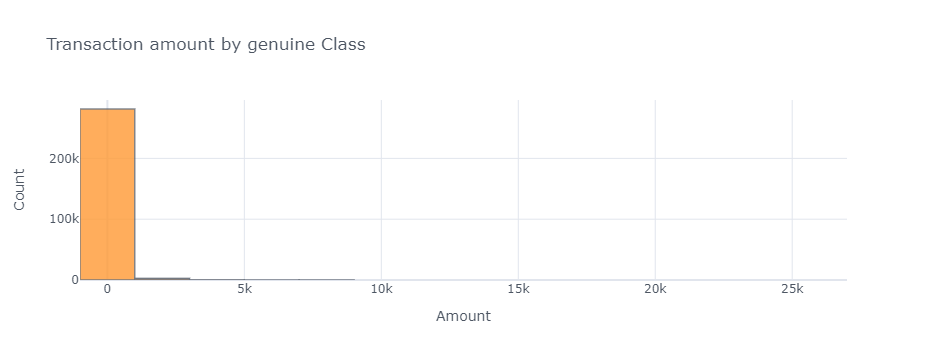

In [16]:
# Visualising Transaction amount by genuine class
genuine["Amount"].iplot(kind="histogram", bins=20, theme="white", title="Transaction amount by genuine Class",
                        xTitle='Amount', yTitle='Count')

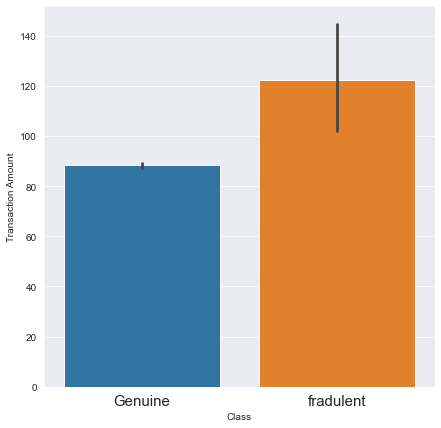

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
bar = sns.barplot(x = "Class" , y = "Amount", ax=ax, data = df)
bar.set_xticklabels(["Genuine", "fradulent"], fontsize=15);
bar.set_ylabel("Transaction Amount");

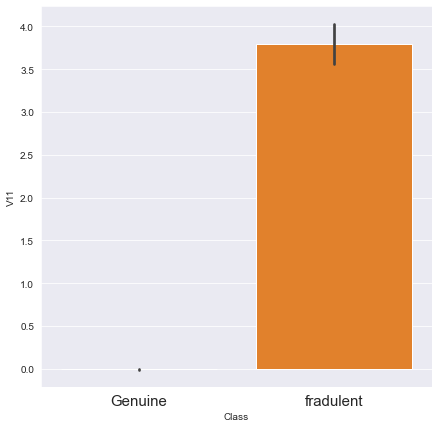

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
bar = sns.barplot(x = "Class" , y = "V11", ax=ax, data = df)
bar.set_xticklabels(["Genuine", "fradulent"], fontsize=15);
bar.set_ylabel("V11");

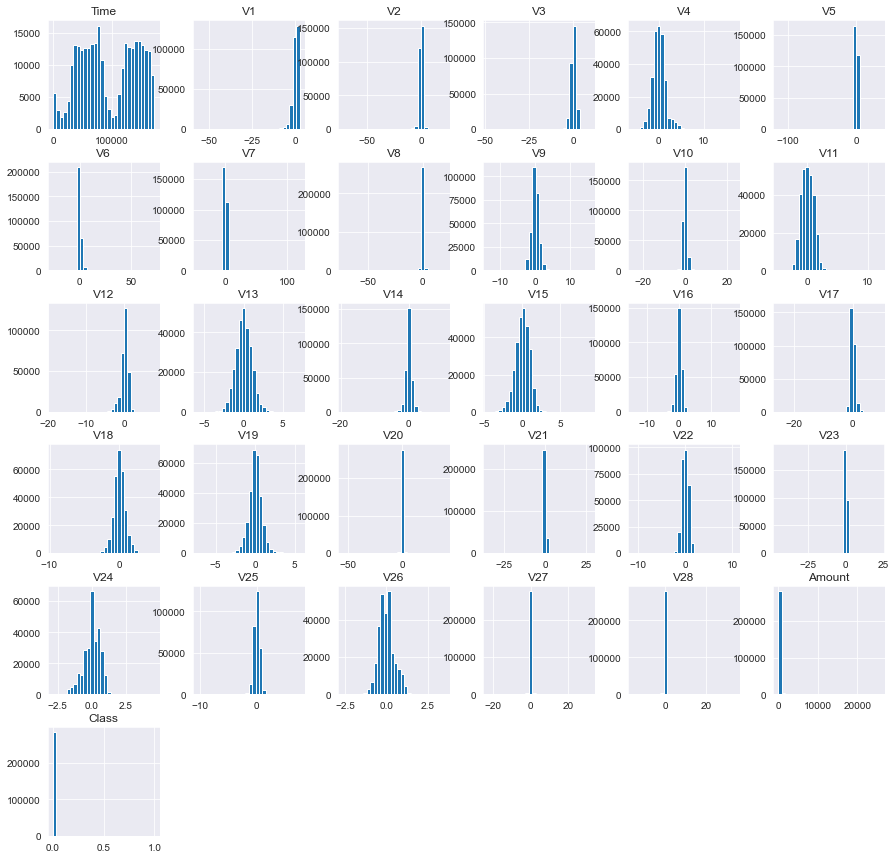

In [19]:
df.hist(bins=30,figsize=(15,15));

[(0.0, 2000.0)]

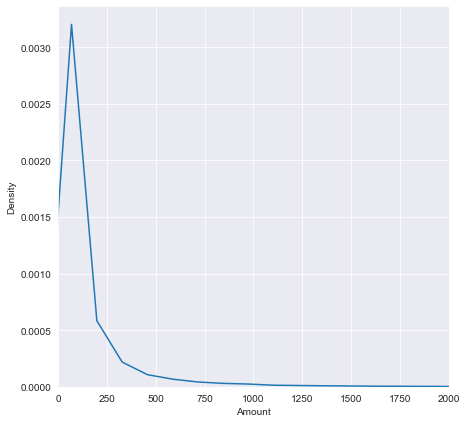

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
kde = sns.kdeplot(df["Amount"])
kde.set(xlim=(0,2000))

The `Amount` variable has a `right-skewed` distribution

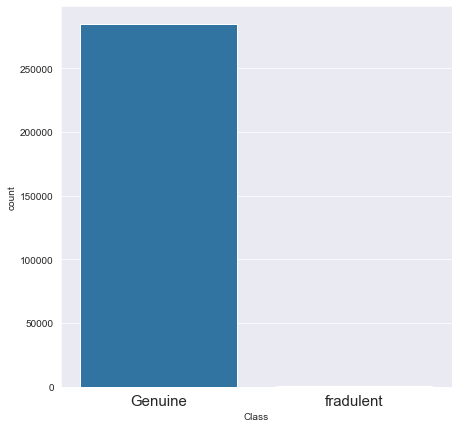

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
count = sns.countplot(x = "Class", data =df )
count.set_xticklabels(["Genuine", "fradulent"], fontsize=15);

<h6>From the countplot Above: <span class="label label-danger">IMPORTANT:</span></h6>

> You can notice that there is a high very class imbalance with `Genuine` class having <br>
a very greater proportion in the dataset

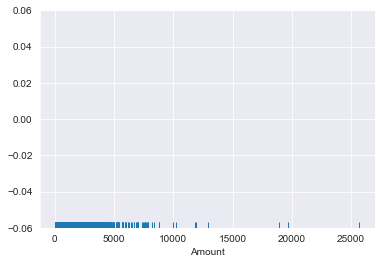

In [22]:
sns.rugplot(df["Amount"]);

### Corelation Plot

<AxesSubplot:>

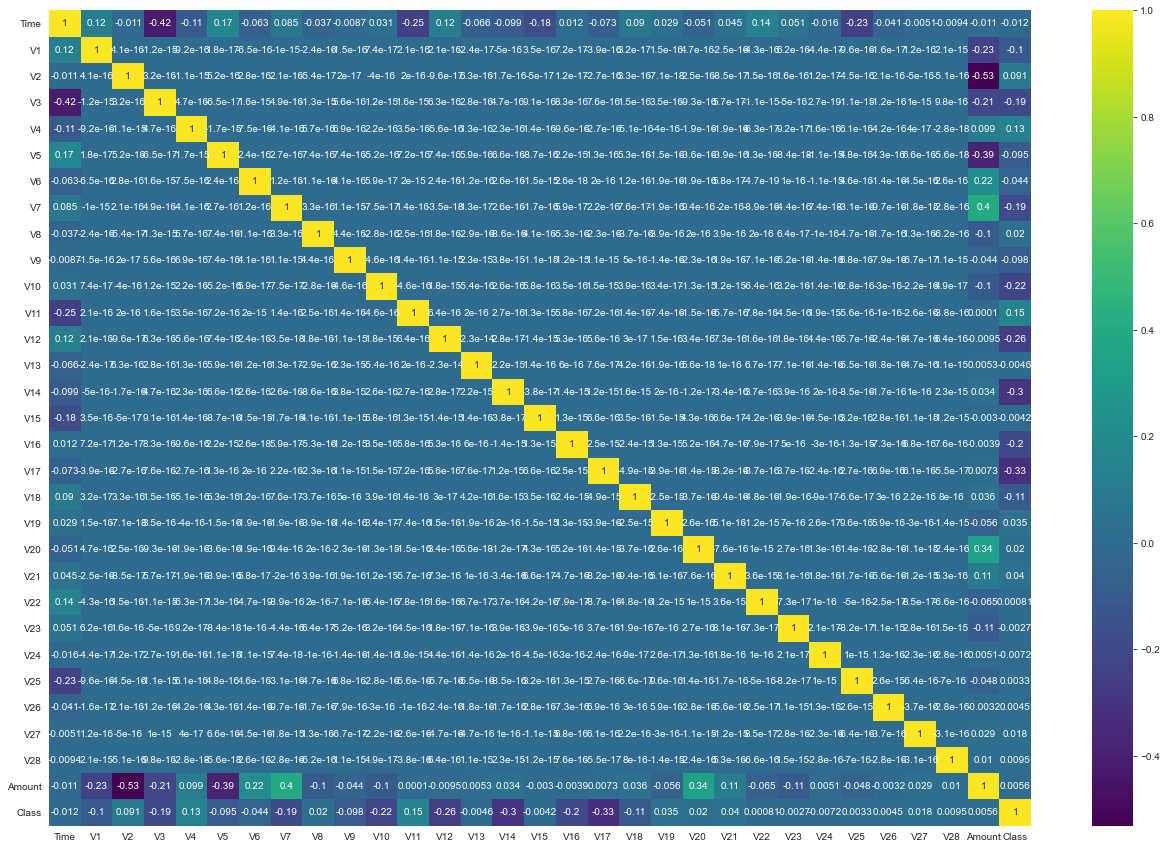

In [23]:
correlation =df.corr()

plt.figure(figsize=(22,15))
sns.heatmap(correlation,annot=True,cmap="viridis")

## Modelling 

In [24]:
# Extract our features 
X = df.drop("Class", axis=1)

# Target variable 
y = df["Class"].values

In [25]:
X.shape

(284807, 30)

In [26]:
len(y)

284807

In [28]:
data_values = {"train":[], "test":[]}
def score_predict_and_evaluate(model, X, y):
    # Create StratifiedKFold object.
    X = X.to_numpy()
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    lst_accu_stratified = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        data_values["train"].append((X_train, y_train))
        data_values["test"].append((X_test, y_test))
        model.fit(X_train, y_train)
        lst_accu_stratified.append(round(model.score(X_test, y_test), 3))
    
    print('List of possible accuracy:\n', lst_accu_stratified)
    print('\nMaximum Accuracy that can be obtained from this model is:',
      round(max(lst_accu_stratified)*100,3), '%')
    print('\nMinimum Accuracy:',
      round(min(lst_accu_stratified)*100,3), '%')
    print('\nOverall Accuracy:',
      round(np.mean(lst_accu_stratified)*100,3), '%')
    print('\nStandard Deviation is:', round(np.std(lst_accu_stratified), 3))
    
    # Make predictions
    i = np.random.choice(np.arange(len(data_values["test"])))
    test_X, test_y = (data_values["test"][i][0], data_values["test"][i][1]) 
    
    predictions = model.predict(test_X)
    print('\nClassification Report:\n', classification_report(test_y, predictions))
    
    fig, ((ax1), (ax2)) = plt.subplots(nrows = 1, 
                                       ncols = 2, figsize=(16, 8))
    
    ##################### Precision Recall Curve ##################### 
    y_probs = model.predict_proba(test_X)
    y_probs_positive = y_probs[:,1]
    precision, recall, thresholds = precision_recall_curve(test_y, y_probs_positive)
    fpr, tpr, thresholds = roc_curve(test_y, y_probs_positive)
    
    ##################### ROC Curve ##################################    
    #plot roc curve
    ax1.plot(fpr, tpr, color = "orange", label = "ROC")
    #plot line with no predictive power (baseline)
    ax1.plot([0, 1], [0, 1], color = "darkblue", linestyle ="--", 
             label = "Baseline")
    
    #Customize the plot
    ax1.set(xlabel="False Positive Rate(FPR)", 
            ylabel="True Positive Rate(TPR)",
            title="Receiver Operating Characteristic  (R0C) Curve")
    ax1.yaxis.label.set_size(14)
    ax1.xaxis.label.set_size(14)
    ax1.legend()
    ax1.title.set_size(18)

    
    AP = average_precision_score(test_y, y_probs_positive)
    ax2.plot(recall, precision, 
             label = str(type(model).__name__) +"("+"AP="+str(round(AP, 2))+")", 
             color="olive")
    ax2.set(xlabel="Recall (Positive label: 1)", 
            ylabel="Precision (Positive label: 1)", 
            title="Precision-Recall Curve")
    ax2.yaxis.label.set_size(14)
    ax2.xaxis.label.set_size(14)
    ax2.title.set_size(18)
    ax2.legend()
    
    plt.show()
    
    print("ROC_AUC_score :",roc_auc_score(test_y, y_probs_positive))
    print("Average Precision score :", average_precision_score(test_y, y_probs_positive))
    data_values["train"].clear()
    data_values["test"].clear()

## Logistic Regression

List of possible accuracy:
 [0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999]

Maximum Accuracy that can be obtained from this model is: 99.9 %

Minimum Accuracy: 99.9 %

Overall Accuracy: 99.9 %

Standard Deviation is: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.83      0.59      0.69        49

    accuracy                           1.00     28480
   macro avg       0.91      0.80      0.85     28480
weighted avg       1.00      1.00      1.00     28480



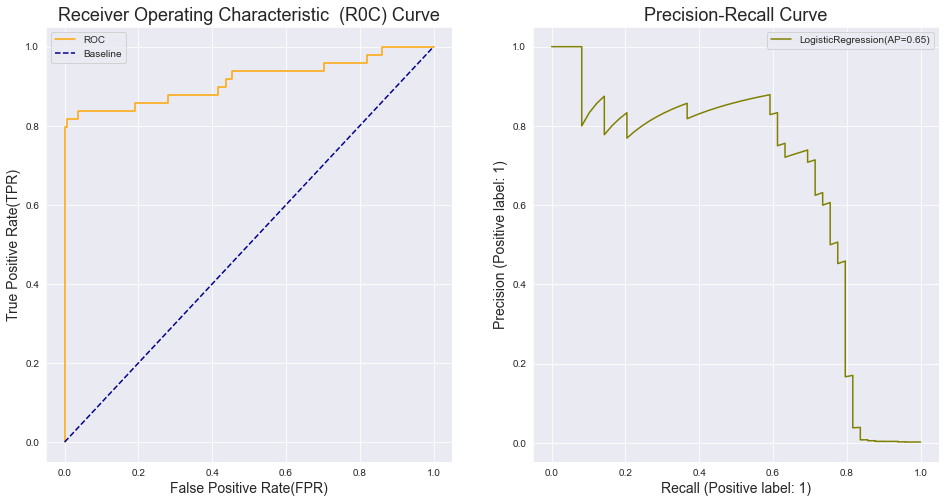

ROC_AUC_score : 0.9140453902358665
Average Precision score : 0.652566865919542


In [29]:
lr = LogisticRegression(max_iter=10000)
score_predict_and_evaluate(lr, X, y)

## Random Forest Classifier

List of possible accuracy:
 [0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy that can be obtained from this model is: 100.0 %

Minimum Accuracy: 99.9 %

Overall Accuracy: 99.99 %

Standard Deviation is: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       1.00      1.00      1.00        49

    accuracy                           1.00     28480
   macro avg       1.00      1.00      1.00     28480
weighted avg       1.00      1.00      1.00     28480



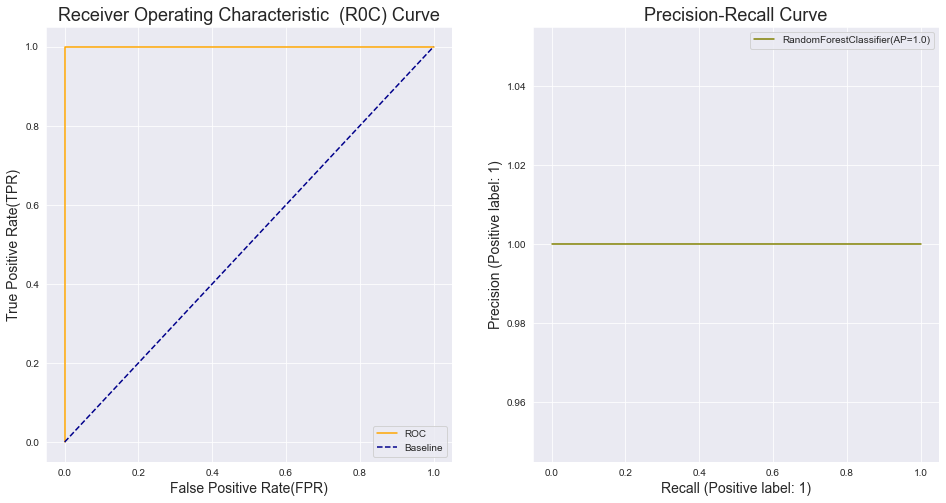

ROC_AUC_score : 1.0
Average Precision score : 1.0


In [30]:
rfc = RandomForestClassifier()
score_predict_and_evaluate(rfc, X, y)

In [31]:
#Saving the Random Forest Classifier
import joblib
joblib.dump(rfc, 'saved_models/random_forest_classifier.pkl')
joblib.dump(lr, 'saved_models/logistic_regression.pkl')

['saved_models/logistic_regression.pkl']